In [208]:
#importing necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

from sklearn import metrics

In [210]:
#importing dataset
df=pd.read_csv("infolimpioavanzadoTarget.csv")
df.head(5)

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,RSIadjclose50,RSIvolume50,MACDadjclose15,MACDvolume15,MACDadjclose25,MACDvolume25,MACDadjclose50,MACDvolume50,MACDsig-adjclose-15,MACDdif-adjclose-15-0,MACDdif-adjclose-15-1,MACDdif-adjclose-15-2,MACDdif-adjclose-15-3,MACDsig-volume-15,MACDdif-volume-15-0,MACDdif-volume-15-1,MACDdif-volume-15-2,MACDdif-volume-15-3,MACDsig-adjclose-25,MACDdif-adjclose-25-0,MACDdif-adjclose-25-1,MACDdif-adjclose-25-2,MACDdif-adjclose-25-3,MACDsig-volume-25,MACDdif-volume-25-0,MACDdif-volume-25-1,MACDdif-volume-25-2,MACDdif-volume-25-3,MACDsig-adjclose-50,MACDdif-adjclose-50-0,MACDdif-adjclose-50-1,MACDdif-adjclose-50-2,MACDdif-adjclose-50-3,MACDsig-volume-50,MACDdif-volume-50-0,MACDdif-volume-50-1,MACDdif-volume-50-2,MACDdif-volume-50-3,MACDhistadjclose15,MACDhistvolume15,MACDhistadjclose25,MACDhistvolume25,MACDhistadjclose50,MACDhistvolume50,laglow1,laghigh1,lagvolume1,laglow2,laghigh2,lagvolume2,laglow5,laghigh5,lagvolume5,laglow10,laghigh10,lagvolume10,laglow15,laghigh15,lagvolume15,feargreed,emaadjclose5,emavolume5,emaadjclose10,emavolume10,emaadjclose15,emavolume15,emaadjclose50,emavolume50,smaadjclose5,smavolume5,smaadjclose10,smavolume10,smaadjclose15,smavolume15,smaadjclose25,smavolume25,smaadjclose50,smavolume50,hammer1y1highhighhigh,hammer1y1highhighlow,hammer1y1highhighvolume,hammer1y1highlowhigh,hammer1y1highlowlow,hammer1y1highlowvolume,hammer1y1highvolumehigh,hammer1y1highvolumelow,hammer1y1highvolumevolume,hammer1y1lowhighhigh,hammer1y1lowhighlow,hammer1y1lowhighvolume,hammer1y1lowlowhigh,hammer1y1lowlowlow,hammer1y1lowlowvolume,hammer1y1lowvolumehigh,hammer1y1lowvolumelow,hammer1y1lowvolumevolume,hammer1y1volumehighhigh,hammer1y1volumehighlow,hammer1y1volumehighvolume,hammer1y1volumelowhigh,hammer1y1volumelowlow,hammer1y1volumelowvolume,hammer1y1volumevolumehigh,hammer1y1volumevolumelow,hammer1y1volumevolumevolume,hammer1y2highhighhigh,hammer1y2highhighlow,hammer1y2highhighvolume,hammer1y2highlowhigh,hammer1y2highlowlow,hammer1y2highlowvolume,hammer1y2highvolumehigh,hammer1y2highvolumelow,hammer1y2highvolumevolume,hammer1y2lowhighhigh,hammer1y2lowhighlow,hammer1y2lowhighvolume,hammer1y2lowlowhigh,hammer1y2lowlowlow,hammer1y2lowlowvolume,hammer1y2lowvolumehigh,hammer1y2lowvolumelow,hammer1y2lowvolumevolume,hammer1y2volumehighhigh,hammer1y2volumehighlow,hammer1y2volumehighvolume,hammer1y2volumelowhigh,hammer1y2volumelowlow,hammer1y2volumelowvolume,hammer1y2volumevolumehigh,hammer1y2volumevolumelow,hammer1y2volumevolumevolume,hammer1y3highhighhigh,hammer1y3highhighlow,hammer1y3highhighvolume,hammer1y3highlowhigh,hammer1y3highlowlow,hammer1y3highlowvolume,hammer1y3highvolumehigh,hammer1y3highvolumelow,hammer1y3highvolumevolume,hammer1y3lowhighhigh,hammer1y3lowhighlow,hammer1y3lowhighvolume,hammer1y3lowlowhigh,hammer1y3lowlowlow,hammer1y3lowlowvolume,hammer1y3lowvolumehigh,hammer1y3lowvolumelow,hammer1y3lowvolumevolume,hammer1y3volumehighhigh,hammer1y3volumehighlow,hammer1y3volumehighvolume,hammer1y3volumelowhigh,hammer1y3volumelowlow,hammer1y3volumelowvolume,hammer1y3volumevolumehigh,hammer1y3volumevolumelow,hammer1y3volumevolumevolume,hammer1y10highhighhigh,hammer1y10highhighlow,hammer1y10highhighvolume,hammer1y10highlowhigh,hammer1y10highlowlow,hammer1y10highlowvolume,hammer1y10highvolumehigh,hammer1y10highvolumelow,hammer1y10highvolumevolume,hammer1y10lowhighhigh,hammer1y10lowhighlow,hammer1y10lowhighvolume,hammer1y10lowlowhigh,hammer1y10lowlowlow,hammer1y10lowlowvolume,hammer1y10lowvolumehigh,hammer1y10lowvolumelow,hammer1y10lowvolumevolume,hammer1y10volumehighhigh,hammer1y10volumehighlow,hammer1y10volumehighvolume,hammer1y10volumelowhigh,hammer1y10volumelowlow,hammer1y10volumelowvolume,hammer1y10volumevolumehigh,hammer1y10volumevolumelow,hammer1y10volumevolumevolume,hammer1y15highhighhigh,hammer1y15highhighlow,hammer1y15highhighvolume,hammer1y15highlowhigh,hammer1y15highlowlow,hammer1y15highlowvolume,hammer1y15highvolumehigh,hamm

In [211]:
df.tail(10)

date       open       high        low      close   adjclose  \
7771  2022-12-16  22.700001  22.879999  22.500000  22.670000  22.095634   
7772  2022-12-19  22.600000  22.799999  22.379999  22.600000  22.027409   
7773  2022-12-20  22.600000  23.000000  22.600000  22.840000  22.261328   
7774  2022-12-21  22.889999  23.389999  22.889999  23.309999  22.719419   
7775  2022-12-22  23.330000  23.379999  23.049999  23.299999  22.709673   
7776  2022-12-23  23.250000  23.540001  23.250000  23.290001  22.699928   
7777  2022-12-27  23.350000  23.610001  23.250000  23.350000  22.758406   
7778  2022-12-28  23.450001  23.570000  23.219999  23.350000  22.758406   
7779  2022-12-29  23.330000  23.740000  23.330000  23.610001  23.011820   
7780  2022-12-30  23.680000  23.760000  23.610001  23.610001  23.011820   

      volume ticker  RSIadjclose15  RSIvolume15  RSIadjclose25  RSIvolume25  \
7771   13800   ATLO      45.827378    48.222673      50.517909    48.996227   
7772  144600   ATLO      44.016221    69.143430      49.286997    63.255500   
7773   21000   ATLO      51.113614    49.069797      53.346834    49.604717   
7774    9600   ATLO      61.385254    47.701266      59.896083    48.597125   
7775    9900   ATLO      61.092635    47.742359      59.710308    48.625730   
7776    4900   ATLO      60.782255    47.081752      59.518051    48.160430   
7777    9200   ATLO      62.022801    47.747952      60.316762    48.601035   
7778   15200   ATLO      62.022801    48.713225      60.316762    49.228256   
7779    7100   ATLO      67.186408    47.445460      63.685794    48.397728   
7780    7100   ATLO      67.186408    47.445460      63.685794    48.397728   

      RSIadjclose50  RSIvolume50  MACDadjclose15  MACDvolume15  \
7771      52.068648    49.562991        0.096888   -874.655329   
7772      51.406924    58.180351        0.063290   9154.510547   
7773      53.475506    49.951193        0.054906   7047.965237   
7774      57.122913    49.294984        0.084254   4407.817603   
7775      57.025851    49.312865        0.105510   2313.025952   
7776      56.927168    49.018883        0.120184    246.587755   
7777      57.378810    49.284206        0.134976  -1032.206706   
7778      57.378810    49.657250        0.145027  -1543.715682   
7779      59.304254    49.159137        0.171464  -2573.032220   
7780      59.304254    49.159137        0.190223  -3350.154496   

      MACDadjclose25  MACDvolume25  MACDadjclose50  MACDvolume50  \
7771        0.096888   -874.655329        0.096888   -874.655329   
7772        0.063290   9154.510547        0.063290   9154.510547   
7773        0.054906   7047.965237        0.054906   7047.965237   
7774        0.084254   4407.817603        0.084254   4407.817603   
7775        0.105510   2313.025952        0.105510   2313.025952   
7776        0.120184    246.587755        0.120184    246.587755   
7777        0.134976  -1032.206706        0.134976  -1032.206706   
7778        0.145027  -1543.715682        0.145027  -1543.715682   
7779        0.171464  -2573.032220        0.171464  -2573.032220   
7780        0.190223  -3350.154496        0.190223  -3350.154496   

      MACDsig-adjclose-15  MACDdif-adjclose-15-0  MACDdif-adjclose-15-1  \
7771             0.162578              -0.162578              -0.317422   
7772             0.150167              -0.150167              -0.300977   
7773             0.138259              -0.138259              -0.175659   
7774             0.131508              -0.131508              -0.002606   
7775             0.128259              -0.128259              -0.034800   
7776             0.127249              -0.127249              -0.062626   
7777             0.128215              -0.128215              -0.062998   
7778             0.130317              -0.130317              -0.085875   
7779             0.135460              -0.135460              -0.019954   
7780             0.142305              -0.142305              -0.060287   

      MACDdif-

In [101]:
#geting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


In [102]:
#dataset records and attributes
df.shape

(7781, 1285)

In [103]:
#checking for null value in the dataset
df.isnull().sum()

date                                0
open                                0
high                                0
low                                 0
close                               0
adjclose                            0
volume                              0
ticker                              0
RSIadjclose15                     465
RSIvolume15                       465
RSIadjclose25                     775
RSIvolume25                       775
RSIadjclose50                    1550
RSIvolume50                      1550
MACDadjclose15                    775
MACDvolume15                      775
MACDadjclose25                    775
MACDvolume25                      775
MACDadjclose50                    775
MACDvolume50                      775
MACDsig-adjclose-15              1209
MACDdif-adjclose-15-0            1209
MACDdif-adjclose-15-1            1209
MACDdif-adjclose-15-2            1209
MACDdif-adjclose-15-3            1209
MACDsig-volume-15                1209
MACDdif-volu

In [105]:
#Checking For Duplicates values in the dataset
df[df.duplicated()]

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,RSIadjclose50,RSIvolume50,MACDadjclose15,MACDvolume15,MACDadjclose25,MACDvolume25,MACDadjclose50,MACDvolume50,MACDsig-adjclose-15,MACDdif-adjclose-15-0,MACDdif-adjclose-15-1,MACDdif-adjclose-15-2,MACDdif-adjclose-15-3,MACDsig-volume-15,MACDdif-volume-15-0,MACDdif-volume-15-1,MACDdif-volume-15-2,MACDdif-volume-15-3,MACDsig-adjclose-25,MACDdif-adjclose-25-0,MACDdif-adjclose-25-1,MACDdif-adjclose-25-2,MACDdif-adjclose-25-3,MACDsig-volume-25,MACDdif-volume-25-0,MACDdif-volume-25-1,MACDdif-volume-25-2,MACDdif-volume-25-3,MACDsig-adjclose-50,MACDdif-adjclose-50-0,MACDdif-adjclose-50-1,MACDdif-adjclose-50-2,MACDdif-adjclose-50-3,MACDsig-volume-50,MACDdif-volume-50-0,MACDdif-volume-50-1,MACDdif-volume-50-2,MACDdif-volume-50-3,MACDhistadjclose15,MACDhistvolume15,MACDhistadjclose25,MACDhistvolume25,MACDhistadjclose50,MACDhistvolume50,laglow1,laghigh1,lagvolume1,laglow2,laghigh2,lagvolume2,laglow5,laghigh5,lagvolume5,laglow10,laghigh10,lagvolume10,laglow15,laghigh15,lagvolume15,feargreed,emaadjclose5,emavolume5,emaadjclose10,emavolume10,emaadjclose15,emavolume15,emaadjclose50,emavolume50,smaadjclose5,smavolume5,smaadjclose10,smavolume10,smaadjclose15,smavolume15,smaadjclose25,smavolume25,smaadjclose50,smavolume50,hammer1y1highhighhigh,hammer1y1highhighlow,hammer1y1highhighvolume,hammer1y1highlowhigh,hammer1y1highlowlow,hammer1y1highlowvolume,hammer1y1highvolumehigh,hammer1y1highvolumelow,hammer1y1highvolumevolume,hammer1y1lowhighhigh,hammer1y1lowhighlow,hammer1y1lowhighvolume,hammer1y1lowlowhigh,hammer1y1lowlowlow,hammer1y1lowlowvolume,hammer1y1lowvolumehigh,hammer1y1lowvolumelow,hammer1y1lowvolumevolume,hammer1y1volumehighhigh,hammer1y1volumehighlow,hammer1y1volumehighvolume,hammer1y1volumelowhigh,hammer1y1volumelowlow,hammer1y1volumelowvolume,hammer1y1volumevolumehigh,hammer1y1volumevolumelow,hammer1y1volumevolumevolume,hammer1y2highhighhigh,hammer1y2highhighlow,hammer1y2highhighvolume,hammer1y2highlowhigh,hammer1y2highlowlow,hammer1y2highlowvolume,hammer1y2highvolumehigh,hammer1y2highvolumelow,hammer1y2highvolumevolume,hammer1y2lowhighhigh,hammer1y2lowhighlow,hammer1y2lowhighvolume,hammer1y2lowlowhigh,hammer1y2lowlowlow,hammer1y2lowlowvolume,hammer1y2lowvolumehigh,hammer1y2lowvolumelow,hammer1y2lowvolumevolume,hammer1y2volumehighhigh,hammer1y2volumehighlow,hammer1y2volumehighvolume,hammer1y2volumelowhigh,hammer1y2volumelowlow,hammer1y2volumelowvolume,hammer1y2volumevolumehigh,hammer1y2volumevolumelow,hammer1y2volumevolumevolume,hammer1y3highhighhigh,hammer1y3highhighlow,hammer1y3highhighvolume,hammer1y3highlowhigh,hammer1y3highlowlow,hammer1y3highlowvolume,hammer1y3highvolumehigh,hammer1y3highvolumelow,hammer1y3highvolumevolume,hammer1y3lowhighhigh,hammer1y3lowhighlow,hammer1y3lowhighvolume,hammer1y3lowlowhigh,hammer1y3lowlowlow,hammer1y3lowlowvolume,hammer1y3lowvolumehigh,hammer1y3lowvolumelow,hammer1y3lowvolumevolume,hammer1y3volumehighhigh,hammer1y3volumehighlow,hammer1y3volumehighvolume,hammer1y3volumelowhigh,hammer1y3volumelowlow,hammer1y3volumelowvolume,hammer1y3volumevolumehigh,hammer1y3volumevolumelow,hammer1y3volumevolumevolume,hammer1y10highhighhigh,hammer1y10highhighlow,hammer1y10highhighvolume,hammer1y10highlowhigh,hammer1y10highlowlow,hammer1y10highlowvolume,hammer1y10highvolumehigh,hammer1y10highvolumelow,hammer1y10highvolumevolume,hammer1y10lowhighhigh,hammer1y10lowhighlow,hammer1y10lowhighvolume,hammer1y10lowlowhigh,hammer1y10lowlowlow,hammer1y10lowlowvolume,hammer1y10lowvolumehigh,hammer1y10lowvolumelow,hammer1y10lowvolumevolume,hammer1y10volumehighhigh,hammer1y10volumehighlow,hammer1y10volumehighvolume,hammer1y10volumelowhigh,hammer1y10volumelowlow,hammer1y10volumelowvolume,hammer1y10volumevolumehigh,hammer1y10volumevolumelow,hammer1y10volumevolumevolume,hammer1y15highhighhigh,hammer1y15highhighlow,hammer1y15highhighvolume,hammer1y15highlowhigh,hammer1y15highlowlow,hammer1y15highlowvolume,hammer1y15highvolumehigh,hamm

In [106]:
#treating the missing values
df.dropna(inplace=True)

In [107]:
df.shape

(4204, 1285)

In [108]:
#Checking the value in target column
df['TARGET'].value_counts()

TARGET
0    3288
1     916
Name: count, dtype: int64

Text(0.5, 1.0, 'TARGET')

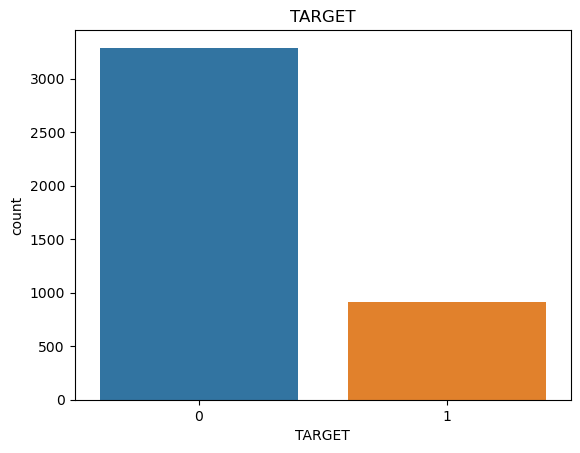

In [109]:
#ploting the target column
sns.countplot(x="TARGET",data=df)
plt.title('TARGET')

<Axes: >

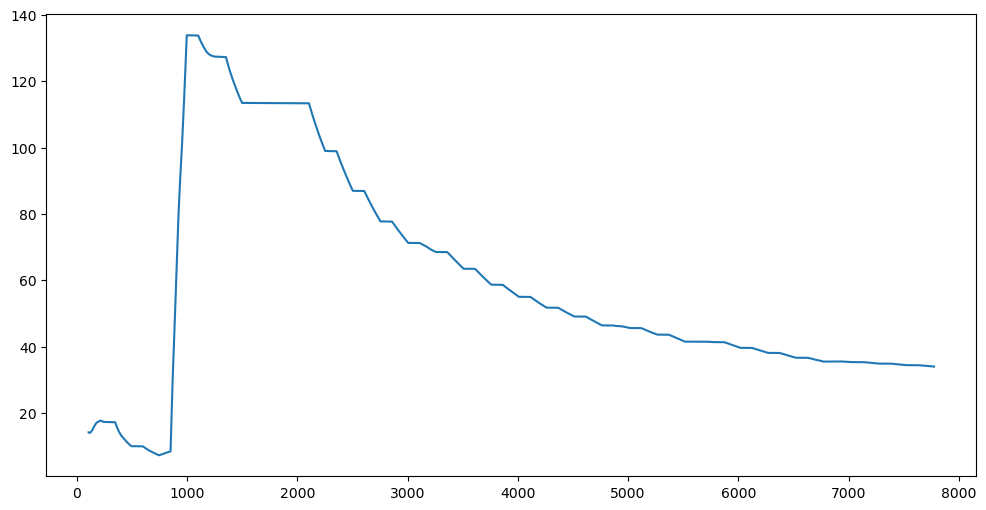

In [110]:
df_new['close'].expanding(min_periods=11).mean().plot(figsize=(12,6))

In [212]:
#creating a dataframe with columns whichever is needed
df_new=df[['date','open','high','low','close','adjclose','volume']]

In [213]:
df_new.head()

,date,open,high,low,close,adjclose,volume
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800


In [214]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      7781 non-null   object 
 1   open      7781 non-null   float64
 2   high      7781 non-null   float64
 3   low       7781 non-null   float64
 4   close     7781 non-null   float64
 5   adjclose  7781 non-null   float64
 6   volume    7781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 425.7+ KB


In [114]:
pd.options.mode.copy_on_write = True

In [215]:
df_new['volume']=df_new['volume'].astype(float)

<Axes: >

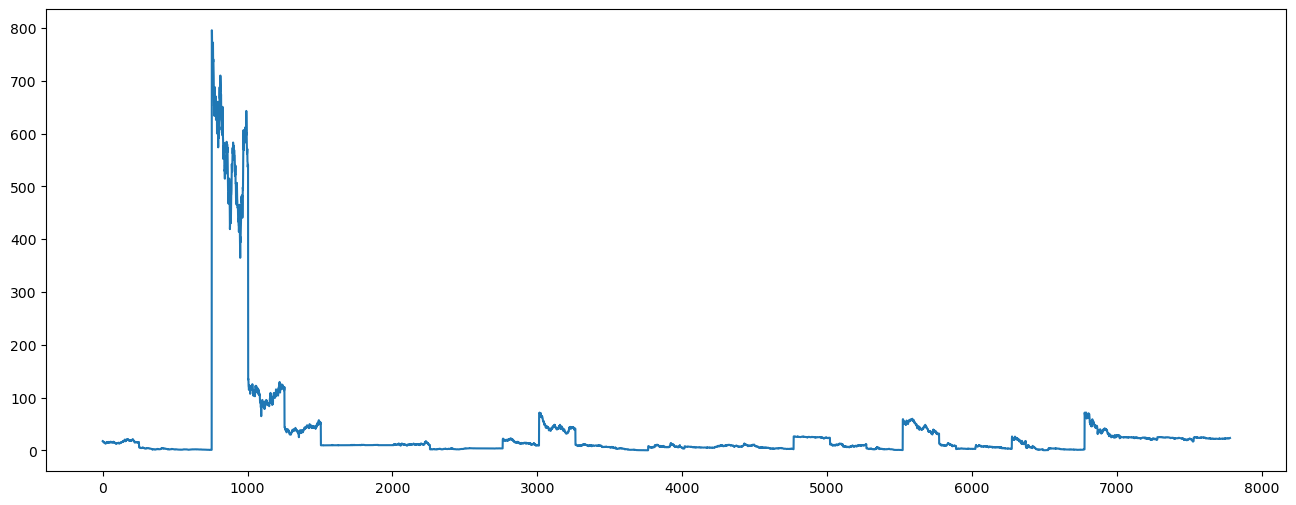

In [216]:
df_new['open'].plot(figsize=(16,6))

In [217]:
 ma_100_days=df_new.close.rolling(window=100).mean()

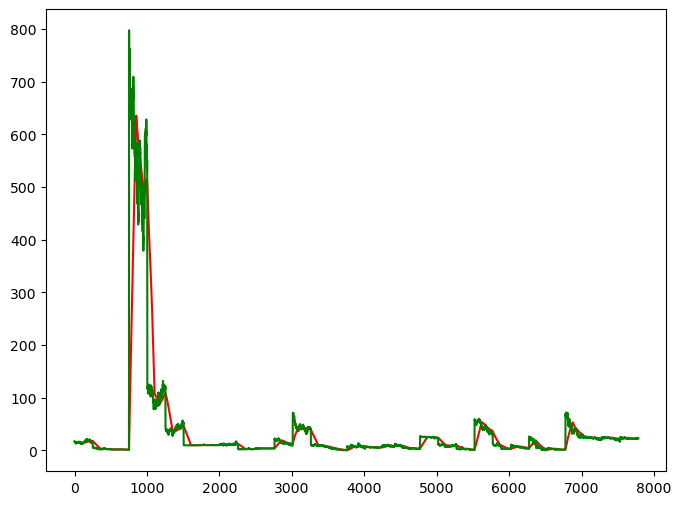

In [218]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(df_new.close,'g')
plt.show()


In [219]:
ma_200_days=df_new.close.rolling(window=200).mean()

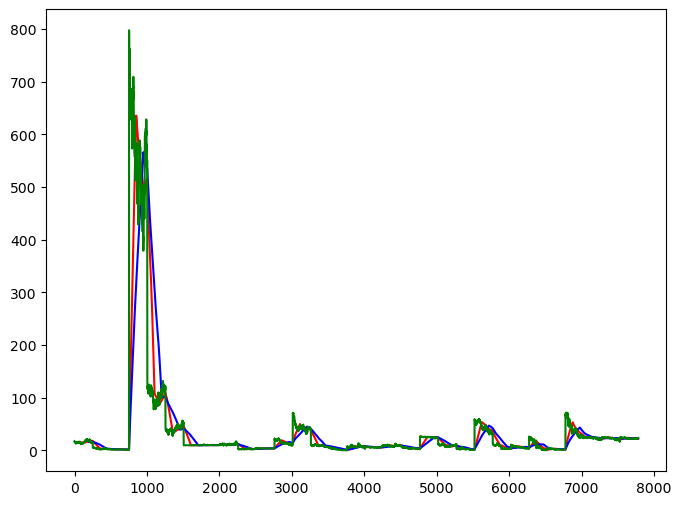

In [220]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(df_new.close,'g')
plt.show()

<Axes: >

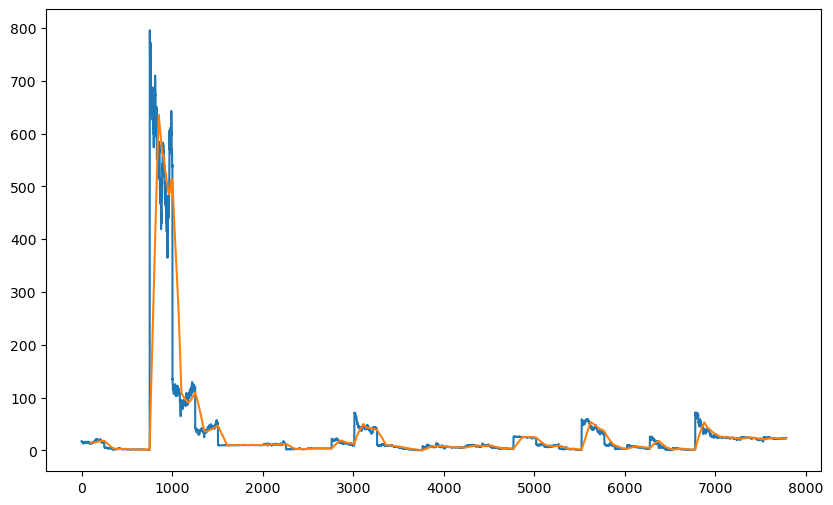

In [221]:
df_new['open'].plot(figsize=(10,6))
df_new.close.rolling(window=100).mean().plot()

## Linear Regression Model

In [296]:
X=df_new[['open','high','low','volume']]
y=df_new['close']

In [297]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20)



In [298]:
X_train.shape

(5835, 4)

In [299]:
X_test.shape

(1946, 4)

In [300]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor=LinearRegression()

In [301]:
regressor.fit(X_train,y_train)

LinearRegression()

In [302]:
print(regressor.coef_)

[-7.20979214e-01  8.59378544e-01  8.62684565e-01  3.30506565e-11]


In [303]:
print(regressor.intercept_)

-0.04022662387345832


In [304]:
pred=regressor.predict(X_test)

In [305]:
print(pred)

[ 1.35392103  6.36386958 19.35694712 ...  8.24009922 29.23475538
  2.77233138]


In [306]:
predicted=regressor.predict(X_test)

In [307]:
print(X_test)

            open        high         low      volume
727     1.410000    1.450000    1.350000    157500.0
3497    6.320000    6.450000    6.280000   1036900.0
191    18.990000   19.480000   18.950001     61900.0
3322   11.440000   11.458000   10.710000   1427900.0
6212    4.400000    4.800000    4.400000      4690.0
2535    4.470000    4.470000    4.400000     14800.0
3661    1.670000    1.700000    1.550000   3725100.0
7095   24.969999   25.045000   24.969999      3200.0
2883   13.200000   13.200000   12.600000      4073.0
2151   11.850000   11.940000   11.560000     43100.0
3559    3.660000    3.800000    3.560000   5432700.0
3313   10.510000   10.880000   10.440000   1000100.0
1828   10.140000   10.140000   10.140000         0.0
5042    9.980000   10.080000    9.710000    359600.0
178    19.740000   20.320000   19.632999    143300.0
5273    4.150000    4.155000    3.800000   2582700.0
5249    9.840000   10.330000    9.840000   2118800.0
5230   10.180000   10.290000    9.350000    77

In [308]:
predicted.shape

(1946,)

In [309]:
dfd=pd.DataFrame({'Actual price': y_test,'predicted price':predicted})

In [310]:
dfd.head()

,Actual price,predicted price
727,1.35,1.353921
3497,6.34,6.363870
191,19.08,19.356947
3322,11.18,10.797930
6212,4.80,4.708294


<Axes: >

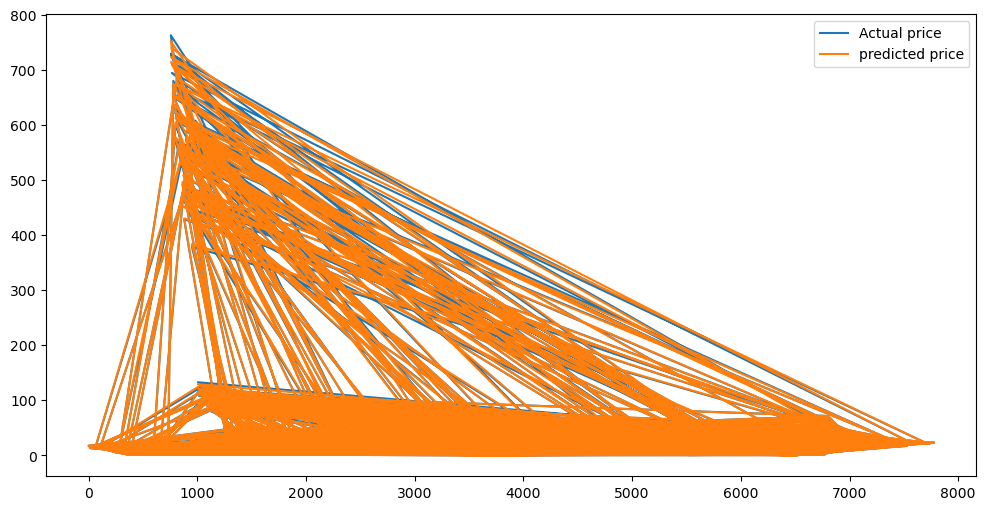

In [311]:
dfd[['Actual price','predicted price']].plot(figsize=(12,6))

In [312]:
regressor.score(X_test,y_test)

0.9998933896151851

In [313]:
import math
from sklearn import metrics

In [314]:
print('mean absolute error:',metrics.mean_absolute_error(y_test,predicted))

mean absolute error: 0.3095201457672082


In [315]:
print('mean square error:',metrics.mean_squared_error(y_test,predicted))

mean square error: 1.0870657977992342


In [316]:
print('root mean squared error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

root mean squared error: 1.0426244759256489


In [317]:
predic=dfd.head(30)

<Axes: >

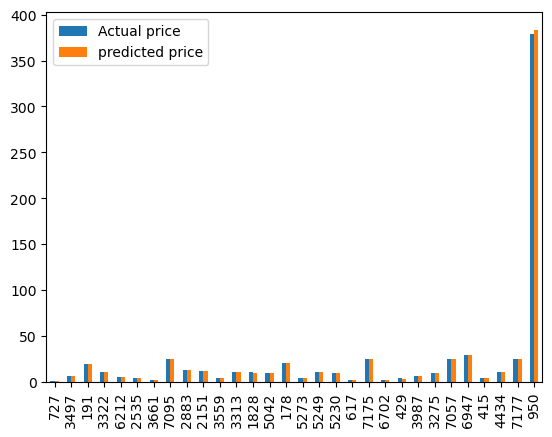

In [318]:
predic.plot(kind='bar')

##  LSTM Model

In [289]:
df1=pd.DataFrame(df_new.close)

In [223]:
#Splinting the dataset into train and test data
data_train=pd.DataFrame(df_new.close[0:int(len(df_new)*0.80)])
data_test = pd.DataFrame(df_new.close[int(len(df_new)*0.80):len(df_new)])

In [224]:
#train data 
data_train.shape

(6224, 1)

In [225]:
#testing data
data_test.shape

(1557, 1)

In [226]:
#Scaling the data using Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [227]:
data_train_scale=scaler.fit_transform(data_train)

In [228]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [229]:
x,y=np.array(x),np.array(y)

In [230]:
#importing library for model building
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [231]:
model = Sequential()
model.add(LSTM(units=50,activation = 'relu', return_sequences =True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation = 'relu', return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units=50,activation = 'relu', return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units=50,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [232]:
model.compile(optimizer ='adam', loss='mean_squared_error')

In [233]:
model.fit(x,y, epochs = 50, batch_size=50,verbose=1)

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 63s 313ms/step - loss: 0.0110
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - loss: 0.0043
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 45s 362ms/step - loss: 0.0031
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 335ms/step - loss: 0.0027
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 81s 328ms/step - loss: 0.0031
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 43s 353ms/step - loss: 0.0020
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 78s 319ms/step - loss: 0.0023
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 331ms/step - loss: 0.0025
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 43s 349ms/step - loss: 0.0022
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 48s 387ms/step - loss: 0.0019
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 77s 345ms/step - loss: 0.0029
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 439s 243ms/step - loss: 0.0018
Epoch 13/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 30s 231ms/step - loss: 0.0018
Epoch 14/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 28s 222ms/step - loss: 0.0022
Epoch 15/50
12

In [234]:
#model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 100, 50)             │          22,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,475 (931.55 KB)

 Trainable params: 79,491 (310.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 158,984 (621.04 KB)

In [235]:
pas_100_days=data_train.tail(100)

In [236]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [237]:
data_test

,close
0,6.700000
1,6.800000
2,6.700000
3,6.900000
4,7.200000
5,7.100000
6,7.400000
7,7.100000
8,6.800000
9,6.900000


In [238]:
data_test_scale=scaler.fit_transform(data_test)

In [239]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
x,y=np.array(x),np.array(y)

In [240]:
y_predict=model.predict(x)

192/192 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step


In [241]:
scale=1/scaler.scale_

In [242]:
y_predicted=y_predict*scale

In [243]:
y=y*scale

In [244]:
rms=np.sqrt(np.mean(np.power((y_predicted),2)))
rms

10.1439140989869

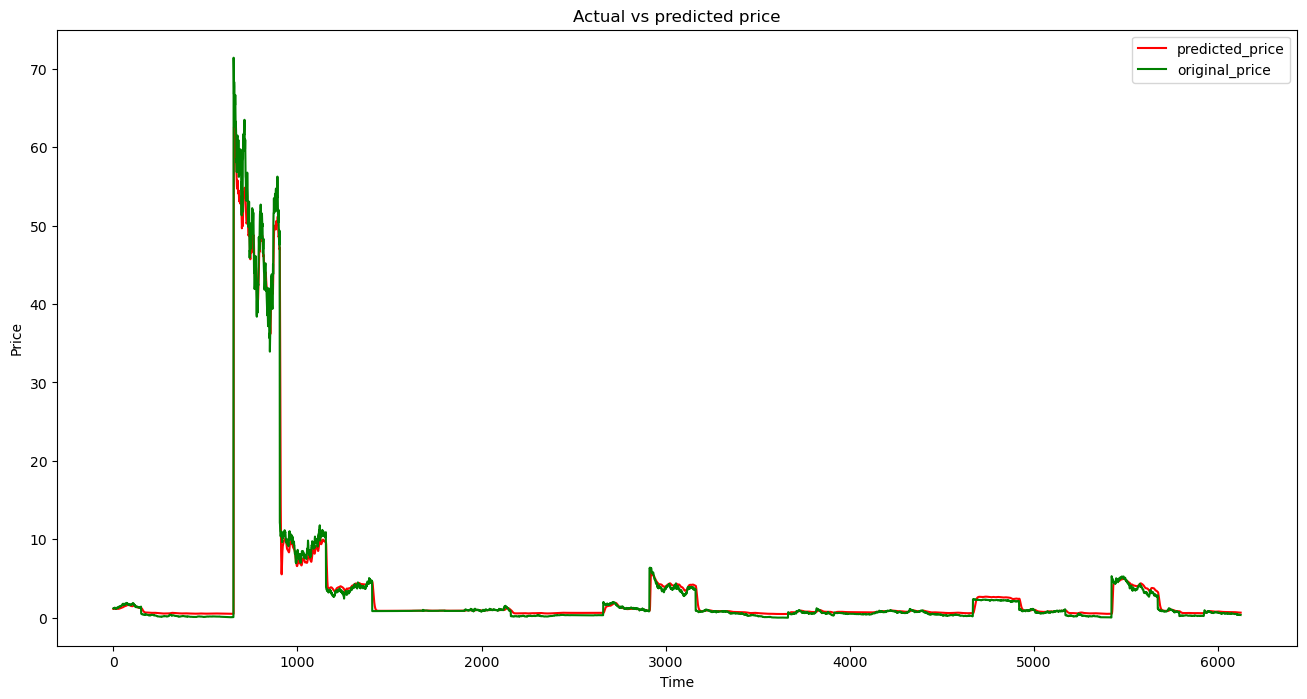

In [295]:
plt.figure(figsize=(16,8))
plt.plot(y_predicted, 'r', label = 'predicted_price')
plt.plot(y,'g', label ='original_price')
plt.title('Actual vs predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
         

In [247]:
train_predict=scaler.inverse_transform(data_train_scale)
test_predict=scaler.inverse_transform(data_test)

In [248]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(data_train,train_predict))

106.91625693379956

In [249]:
math.sqrt(mean_squared_error(data_test,test_predict))

1645.9204009679722

In [250]:
len(data_test)

1657

In [251]:
x_input=data_test_scale[1557:].T
x_input.shape

(1, 100)

In [252]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [253]:
temp_input

[0.30252100152854683,
 0.3032212709191548,
 0.3049019548556047,
 0.3046218364139356,
 0.30532210580454344,
 0.3039215403097627,
 0.30546216502537804,
 0.303781507802493,
 0.3050420140764392,
 0.3043417179722664,
 0.30098037681293155,
 0.300840317592097,
 0.30168064620353946,
 0.30028010742232364,
 0.30042013992959327,
 0.2990196011483774,
 0.30112043603376615,
 0.30014004820148904,
 0.30028010742232364,
 0.30098037681293155,
 0.30042013992959327,
 0.30336133013998934,
 0.30182070542437406,
 0.30154061369626983,
 0.304481777193101,
 0.30658261207848975,
 0.30350138936082394,
 0.30532210580454344,
 0.3046218364139356,
 0.3046218364139356,
 0.3046218364139356,
 0.3012604952546007,
 0.30112043603376615,
 0.30112043603376615,
 0.3012604952546007,
 0.3029411524774857,
 0.30350138936082394,
 0.303781507802493,
 0.308123236794105,
 0.3079831775732704,
 0.3060224019087162,
 0.3028010932566511,
 0.3030812116983203,
 0.303781507802493,
 0.30350138936082394,
 0.308123236794105,
 0.308123236794105,

In [254]:
#demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.33560494]
101
1 day input [0.30322127 0.30490195 0.30462184 0.30532211 0.30392154 0.30546217
 0.30378151 0.30504201 0.30434172 0.30098038 0.30084032 0.30168065
 0.30028011 0.30042014 0.2990196  0.30112044 0.30014005 0.30028011
 0.30098038 0.30042014 0.30336133 0.30182071 0.30154061 0.30448178
 0.30658261 0.30350139 0.30532211 0.30462184 0.30462184 0.30462184
 0.3012605  0.30112044 0.30112044 0.3012605  0.30294115 0.30350139
 0.30378151 0.30812324 0.30798318 0.3060224  0.30280109 0.30308121
 0.30378151 0.30350139 0.30812324 0.30812324 0.30868345 0.30854341
 0.30784312 0.30854341 0.30714285 0.30770306 0.30630249 0.30658261
 0.30574228 0.30658261 0.30266106 0.30224088 0.30098038 0.30588234
 0.31554622 0.30924368 0.30854341 0.30994395 0.31134452 0.30924368
 0.30868345 0.30938374 0.31064425 0.31022407 0.31064425 0.31092434
 0.3117647  0.31218485 0.31274508 0.31008401 0.31134452 0.31358541
 0.31568625 0.32044815 0.31568625 0.31512604 0.31694675 0.31764705
 0.31862744 0.3187675  0.3145658 

9 day output [[0.38440612]]
10 day input [0.30098038 0.30084032 0.30168065 0.30028011 0.30042014 0.2990196
 0.30112044 0.30014005 0.30028011 0.30098038 0.30042014 0.30336133
 0.30182071 0.30154061 0.30448178 0.30658261 0.30350139 0.30532211
 0.30462184 0.30462184 0.30462184 0.3012605  0.30112044 0.30112044
 0.3012605  0.30294115 0.30350139 0.30378151 0.30812324 0.30798318
 0.3060224  0.30280109 0.30308121 0.30378151 0.30350139 0.30812324
 0.30812324 0.30868345 0.30854341 0.30784312 0.30854341 0.30714285
 0.30770306 0.30630249 0.30658261 0.30574228 0.30658261 0.30266106
 0.30224088 0.30098038 0.30588234 0.31554622 0.30924368 0.30854341
 0.30994395 0.31134452 0.30924368 0.30868345 0.30938374 0.31064425
 0.31022407 0.31064425 0.31092434 0.3117647  0.31218485 0.31274508
 0.31008401 0.31134452 0.31358541 0.31568625 0.32044815 0.31568625
 0.31512604 0.31694675 0.31764705 0.31862744 0.3187675  0.3145658
 0.31330529 0.31218485 0.31036413 0.30938374 0.31274508 0.31932771
 0.31918765 0.31904762 

17 day output [[0.43757385]]
18 day input [0.30028011 0.30098038 0.30042014 0.30336133 0.30182071 0.30154061
 0.30448178 0.30658261 0.30350139 0.30532211 0.30462184 0.30462184
 0.30462184 0.3012605  0.30112044 0.30112044 0.3012605  0.30294115
 0.30350139 0.30378151 0.30812324 0.30798318 0.3060224  0.30280109
 0.30308121 0.30378151 0.30350139 0.30812324 0.30812324 0.30868345
 0.30854341 0.30784312 0.30854341 0.30714285 0.30770306 0.30630249
 0.30658261 0.30574228 0.30658261 0.30266106 0.30224088 0.30098038
 0.30588234 0.31554622 0.30924368 0.30854341 0.30994395 0.31134452
 0.30924368 0.30868345 0.30938374 0.31064425 0.31022407 0.31064425
 0.31092434 0.3117647  0.31218485 0.31274508 0.31008401 0.31134452
 0.31358541 0.31568625 0.32044815 0.31568625 0.31512604 0.31694675
 0.31764705 0.31862744 0.3187675  0.3145658  0.31330529 0.31218485
 0.31036413 0.30938374 0.31274508 0.31932771 0.31918765 0.31904762
 0.31988794 0.31988794 0.3235294  0.3235294  0.33560494 0.33845344
 0.34284139 0.348158

25 day output [[0.49139276]]
26 day input [0.30350139 0.30532211 0.30462184 0.30462184 0.30462184 0.3012605
 0.30112044 0.30112044 0.3012605  0.30294115 0.30350139 0.30378151
 0.30812324 0.30798318 0.3060224  0.30280109 0.30308121 0.30378151
 0.30350139 0.30812324 0.30812324 0.30868345 0.30854341 0.30784312
 0.30854341 0.30714285 0.30770306 0.30630249 0.30658261 0.30574228
 0.30658261 0.30266106 0.30224088 0.30098038 0.30588234 0.31554622
 0.30924368 0.30854341 0.30994395 0.31134452 0.30924368 0.30868345
 0.30938374 0.31064425 0.31022407 0.31064425 0.31092434 0.3117647
 0.31218485 0.31274508 0.31008401 0.31134452 0.31358541 0.31568625
 0.32044815 0.31568625 0.31512604 0.31694675 0.31764705 0.31862744
 0.3187675  0.3145658  0.31330529 0.31218485 0.31036413 0.30938374
 0.31274508 0.31932771 0.31918765 0.31904762 0.31988794 0.31988794
 0.3235294  0.3235294  0.33560494 0.33845344 0.34284139 0.34815836
 0.35390279 0.35983539 0.36587611 0.37199524 0.37816373 0.38440612
 0.39076045 0.39723682

In [283]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [290]:
len(df1)

7781

In [291]:
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

Text(0.5, 1.0, 'Prediction made for next 30 days')

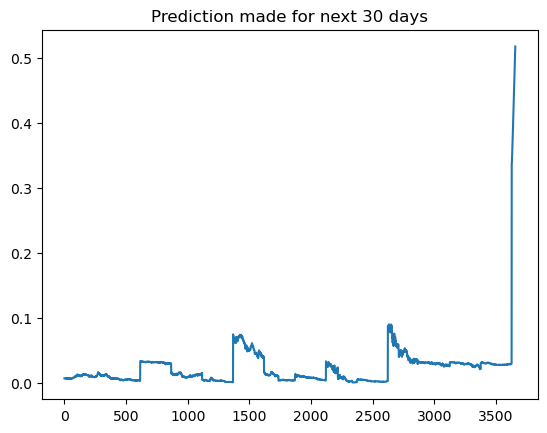

In [292]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[4154:])
plt.title('Prediction made for next 30 days')

In [287]:
df3=scaler.inverse_transform(df3).tolist()

Text(0, 0.5, 'Price')

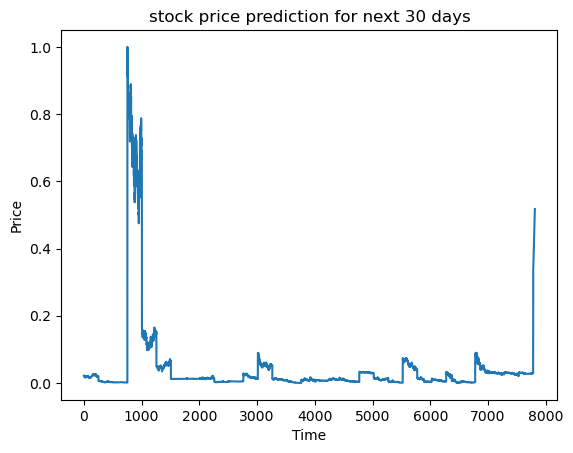

In [265]:
plt.plot(df3)
plt.title('stock price prediction for next 30 days')
plt.xlabel('Time')
plt.ylabel('Price')